<a href="https://colab.research.google.com/github/JUudhhayKiirran/UNP/blob/main/Module_1_Revision_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the dataset
Housing dataset contains the information of the properties sold in the city of "Nashville" over a sapn of 40 years. It contains all the necessary information like the area of the property, amount it was sold for, number of rooms that the property has etc. Our aim is to find some interesting insights from the data.

### Loading data
1. Import the "housing" data using appropriate functions.


### Cleaning data
1. Replace the missing values with appropriate approximations
2. Rename the columns to better suited names
3. Extract the month and year from the sale date.
4. Extract the pin number from the property address


### EDA
Use appropriate plots and functions to answer the following questions.

1. How has the price of properties changed over the years
2. Does a specific month or span of months have the highest property prices?
3. For what purpose were the properties generally purchased?
4. What is the average age of the properties?
5. Have the age of houses affected the price?
6. Have the number of rooms in the house affected the price?
7. Does the size of the property (no. of acres) have any influence in its price?
8. Are houses located in specific pin numbers expensive over the others?
9. How have house prices changed in the 21st centuary as supposed to 20th centuary. 

IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

**LOADING DATA**

In order to load the data, we will use the pandas library and particularly the 'read_excel' method.

In [3]:
data = pd.read_excel('Housing.xlsx')
data.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


**CLEANING DATA**

The major goal of cleaning data is to ensure that all the null values are either eliminated or replaced so as to ensure that the data is fit for analysis. 

In [4]:
data.isnull().sum()

UniqueID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
Acre               30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

1. Replace the missing values with appropriate approximations

Here we are filling all of the null values, with the mean value of their corresponding columns. 

In [5]:
data['Acre']=data["Acre"].fillna(np.mean(data["Acre"]))
data['LandValue']=data["LandValue"].fillna(np.mean(data["LandValue"]))
data['BuildingValue']=data["BuildingValue"].fillna(np.mean(data["BuildingValue"]))
data['TotalValue']=data["TotalValue"].fillna(np.mean(data["TotalValue"]))
data['YearBuilt']=data["YearBuilt"].fillna(np.mean(data["YearBuilt"]))
data['Bedrooms']=data["Bedrooms"].fillna(np.mean(data["Bedrooms"]))
data['FullBath']=data["FullBath"].fillna(np.mean(data["FullBath"]))
data['HalfBath']=data["HalfBath"].fillna(np.mean(data["HalfBath"]))
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56473,27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56474,52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56475,54042,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


**2. Rename the columns to better suited names**

Most of the columns are aptly named, maybe except for 'FullBath' and 'HalfBath'. So, we can rename them using the 'rename()' method.

In [6]:
data.columns

Index(['UniqueID ', 'LandUse', 'PropertyAddress', 'SaleDate', 'SalePrice',
       'Acre', 'LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt',
       'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')

In [7]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)

**3. Extract the month and year from the sale date.**

We can use the 'DatetimeIndex' method in pandas to extract the year, month and day of any given date.

In [8]:
data['Year']=pd.DatetimeIndex(data['SaleDate']).year
data['Month']=pd.DatetimeIndex(data['SaleDate']).month
data['Day']=pd.DatetimeIndex(data['SaleDate']).day
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27
56473,27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2
56474,52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16
56475,54042,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,9,7


**4. Extract the pin number from the property address**

In [9]:
data['Pin'] = data['PropertyAddress'].str[:4]
data['Pin']

0        1808
1        1832
2        1864
3        1853
4        1829
         ... 
56472    1435
56473    1423
56474    1804
56475    1709
56476    1713
Name: Pin, Length: 56477, dtype: object

**EXPLORATORY DATA ANALYSIS**

1. How has the price of properties changed over the years


In [10]:
sales_grouped_data = data.groupby('Year')['SalePrice'].count()
sales_grouped_data

Year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: SalePrice, dtype: int64

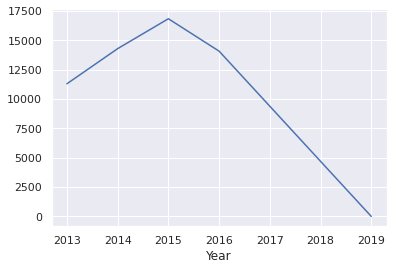

In [11]:
sns.lineplot(x=sales_grouped_data.index, y =sales_grouped_data.values)


As the above line plot clearly suggests, the sale prices of houses peaked around the year 2015, and ever since have rapidly declined. 

2. Does a specific month or span of months have the highest property prices?
 

In [12]:
month_grouped_data = data.groupby('Month')['SalePrice'].count()
month_grouped_data

Month
1     3227
2     2778
3     4474
4     5223
5     5932
6     6593
7     5471
8     5620
9     5451
10    4822
11    3114
12    3772
Name: SalePrice, dtype: int64

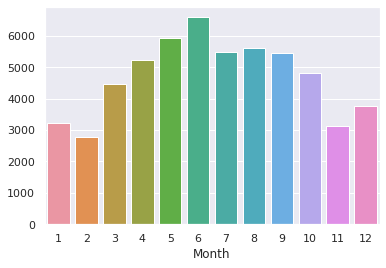

In [13]:
sns.barplot(x=month_grouped_data.index,y=month_grouped_data.values)

From the above barplot, we can make out that the sales are at their peak during the middle of the year, especially around June. 

3. For what purpose were the properties generally purchased?


In [14]:
data['LandUse'].unique()

array(['SINGLE FAMILY', 'RESIDENTIAL CONDO', 'VACANT RURAL LAND',
       'VACANT RES LAND', 'DUPLEX', 'VACANT RESIDENTIAL LAND', 'CHURCH',
       'ZERO LOT LINE', 'RESIDENTIAL COMBO/MISC', 'PARSONAGE',
       'OFFICE BLDG (ONE OR TWO STORIES)',
       'GREENBELT/RES_x000D_\nGRRENBELT/RES', 'MOBILE HOME',
       'PARKING LOT', 'CLUB/UNION HALL/LODGE', 'TRIPLEX',
       'VACANT ZONED MULTI FAMILY', 'SPLIT CLASS', 'CONDO', 'QUADPLEX',
       'LIGHT MANUFACTURING', 'FOREST', 'CONVENIENCE MARKET WITHOUT GAS',
       'DORMITORY/BOARDING HOUSE', 'GREENBELT', 'DAY CARE CENTER',
       'METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK',
       'TERMINAL/DISTRIBUTION WAREHOUSE', 'NIGHTCLUB/LOUNGE',
       'RESTURANT/CAFETERIA', 'VACANT COMMERCIAL LAND',
       'CONDOMINIUM OFC  OR OTHER COM CONDO', 'STRIP SHOPPING CENTER',
       'VACANT RESIENTIAL LAND', 'APARTMENT: LOW RISE (BUILT SINCE 1960)',
       'ONE STORY GENERAL RETAIL STORE', 'NON-PROFIT CHARITABLE SERVICE',
       'SMALL SERVICE SHOP', 'MO

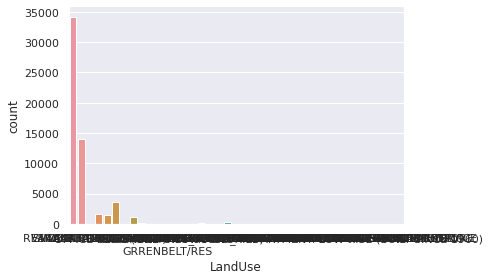

In [15]:
sns.countplot(x='LandUse', data = data)

In [16]:
purpose_grouped_data = data.groupby('LandUse')['LandUse'].count()
purpose_grouped_data.sort_values(ascending = False)

LandUse
SINGLE FAMILY                                 34197
RESIDENTIAL CONDO                             14080
VACANT RESIDENTIAL LAND                        3547
VACANT RES LAND                                1549
DUPLEX                                         1373
ZERO LOT LINE                                  1048
CONDO                                           247
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
VACANT COMMERCIAL LAND                           17
SPLIT CLASS                                      17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARS

Clearly, from the above arrangement 'SINGLE FAMILY' and 'RESIDENTIAL CONDO' were the major reasons for the purchase of houses.

4. What is the average age of the properties?


In [17]:
math.trunc(data['Year'].mean())

2014

5. Have the age of houses affected the price?


In [18]:
data.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,2013,4,9,1808
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,2014,6,10,1832
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,2016,9,26,1864
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,2016,1,29,1853
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,2014,10,10,1829


In [19]:
age_grouped_data = data.groupby('YearBuilt')['SalePrice'].count()
age_grouped_data

YearBuilt
1799.0      1
1832.0      1
1870.0      2
1880.0      1
1890.0      1
         ... 
2013.0    297
2014.0    526
2015.0    712
2016.0    600
2017.0     13
Name: SalePrice, Length: 127, dtype: int64

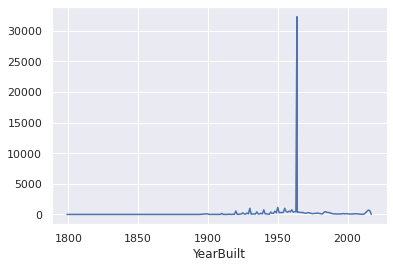

In [20]:
sns.lineplot(x=age_grouped_data.index, y=age_grouped_data.values)

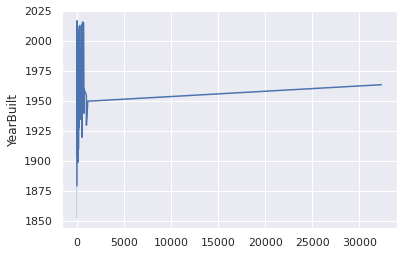

In [21]:
sns.lineplot(y=age_grouped_data.index, x=age_grouped_data.values)

6. Have the number of rooms in the house affected the price?


In [22]:
data['TotalRooms'] = data['Bedrooms'] + data['FullBathroom'] + data['HalfBathroom']
data['TotalRooms']

0        6.000000
1        8.000000
2        7.000000
3        6.000000
4        7.000000
           ...   
56472    5.259848
56473    5.259848
56474    5.259848
56475    5.259848
56476    5.259848
Name: TotalRooms, Length: 56477, dtype: float64

In [23]:
rooms_grouped_data = data.groupby('TotalRooms')['SalePrice'].count()
rooms_grouped_data

TotalRooms
0.000000        40
1.000000         2
2.000000        95
3.000000      3450
3.089912       118
3.283921         1
4.000000      4243
4.283921         7
5.000000      7366
5.169936         1
5.259848     32201
5.283921        46
6.000000      4545
6.283921        55
7.000000      1961
7.283921        18
8.000000      1102
8.089912         1
8.283921         4
9.000000       541
10.000000      304
11.000000      202
12.000000       94
13.000000       48
14.000000       19
15.000000        6
16.000000        2
17.000000        2
20.000000        2
22.000000        1
Name: SalePrice, dtype: int64

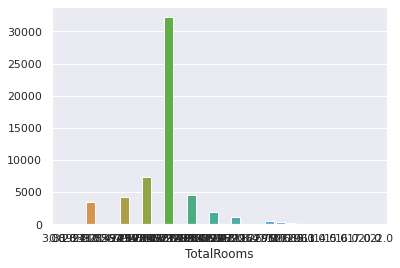

In [24]:
sns.barplot(x = rooms_grouped_data.index, y = rooms_grouped_data.values)

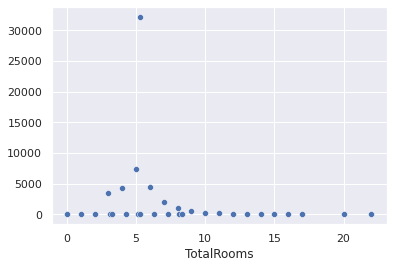

In [25]:
sns.scatterplot(x=rooms_grouped_data.index, y=rooms_grouped_data.values)

In [26]:
math.trunc(data['TotalRooms'].mean())

5

Here, we make an interesting obervation that the sale prices of houses with 5 rooms is the maximum by a large extent. And, in fact, the the number of houses around 5 also show a considerably high sales price. Since, the mean of all of the number of houses is also 5, it's interesting to note that sales prices tend to be high with an average number of rooms in a house. 

**7. Does the size of the property (no. of acres) have any influence in its price?**


In [27]:
property_grouped_data=data.groupby('Acre')['SalePrice'].count()
property_grouped_data

Acre
0.01       4
0.02       6
0.03       6
0.04      12
0.05      22
          ..
47.50      1
51.34      1
62.96      1
68.79      1
160.06     1
Name: SalePrice, Length: 520, dtype: int64

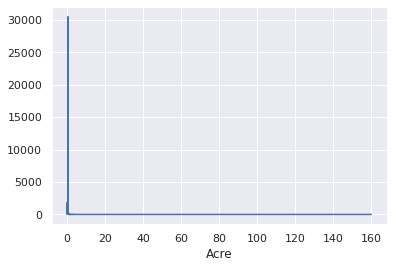

In [28]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)

[(0.0, 12.0)]

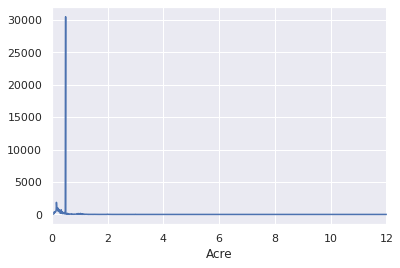

In [29]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,12))

[(0.0, 1.0)]

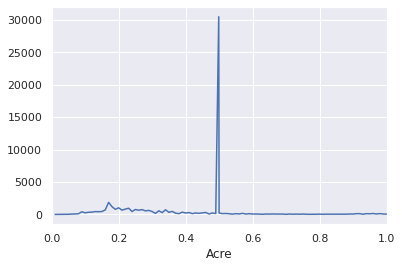

In [30]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,1))

8. Are houses located in specific pin numbers expensive over the others?


In [31]:
pin_grouped_data = data.groupby('Pin')['SalePrice'].count()
pin_grouped_data

Pin
  12    1
  AC    1
  HA    1
  LO    2
  MA    1
       ..
STRA    1
SUNN    1
TYNE    1
WASH    2
WEST    1
Name: SalePrice, Length: 6530, dtype: int64

9. How have house prices changed in the 21st centuary as supposed to 20th centuary.